In [1]:
#First import the tools that are needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


In [2]:
#Next import the TRAINING data

training = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/train.csv')
training.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [3]:
#Next important the SampleSub

samplesub = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/sample_sub_reg_origin.csv')
samplesub.head(2)

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217


In [4]:
#Next import the TEST Data
testing = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/test.csv')
testing.head(2)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [5]:
training['SalePrice'].mean()

181469.70160897123

In [6]:
#Add the mean saleprice to the testing column

testing['SalePrice'] = training['SalePrice'].mean()
testing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,181469.701609
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,181469.701609
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,181469.701609
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,181469.701609
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,181469.701609


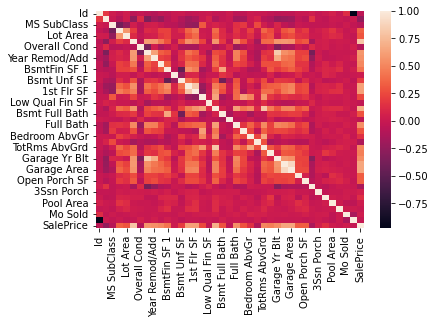

In [7]:
#See correlation model of the training set

sns.heatmap(training.corr());

#Features to try - Full bath, Garage Area


In [24]:
#Lot Area, BsmtFin SF 1 , 1st Flr SF, 2nd Flr SF, Full Bath, 
# Garage Area, Bedroom AbvGr, Kitchen AbvGr, Wood Deck SF, 
#Open Porch SF, Pool Area
# 
# SN: Catergorical -columns 40-43, 16, 17, 28-29,   

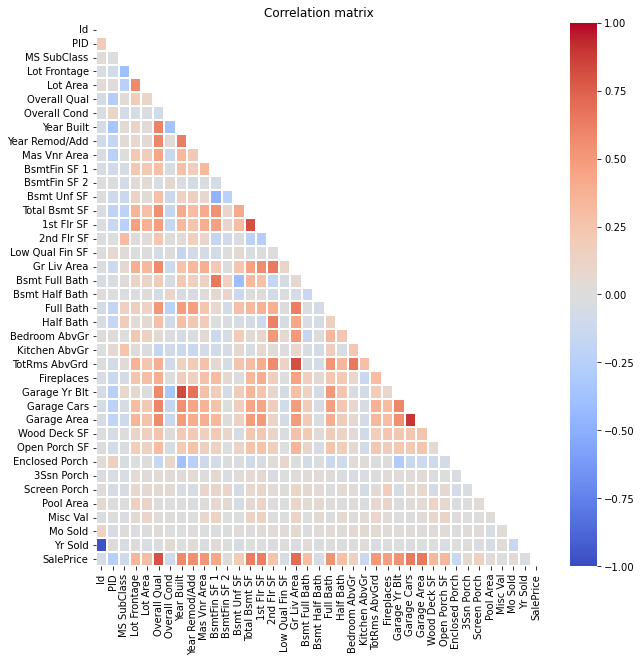

In [8]:
mask = np.zeros_like(training.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    training.corr(),
    cmap='coolwarm',
    annot=False,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.1,
    center=0
)

plt.title('Correlation matrix'); 



In [9]:
#Establish our X & y with some dtype objects

X = training[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch', 
'Heating QC', 'Central Air', 'Electrical', 'Fence'

]] 

y = training['SalePrice']

In [10]:
#Apply TTS

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=444)

In [24]:
si = SimpleImputer(strategy='most_frequent')

In [25]:
X_train_filled = si.fit_transform(X_train, y_train)

In [26]:
X_test_filled = si.transform(X_test)

In [38]:
ohe = OneHotEncoder()

In [109]:
X_train_filled = pd.DataFrame(X_train_filled, columns=X_train.columns)
X_train_filled.head()

,Lot Area,Overall Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,...,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,Heating QC,Central Air,Electrical,Fence
0,12929,6,697.0,384.0,1081.0,1081,0,1081,1.0,1,...,0,1.0,401.0,36,82,0,TA,Y,SBrkr,MnPrv
1,2544,7,368.0,190.0,600.0,600,600,1200,1.0,2,...,0,2.0,480.0,0,172,0,Ex,Y,SBrkr,MnPrv
2,9170,5,698.0,420.0,1214.0,1214,0,1214,1.0,1,...,0,2.0,461.0,0,0,0,Ex,Y,SBrkr,GdPrv
3,9100,5,0.0,742.0,742.0,779,0,935,0.0,1,...,0,1.0,308.0,0,0,0,TA,Y,FuseA,MnPrv
4,8883,7,608.0,0.0,929.0,946,927,1873,1.0,2,...,1,2.0,619.0,108,48,144,Ex,Y,SBrkr,GdPrv


In [110]:
X_test_filled = pd.DataFrame(X_test_filled, columns=X_test.columns)

In [111]:
ohe=OneHotEncoder(drop='if_binary',sparse=False)

In [112]:
ohe.fit_transform(X_train_filled)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [118]:
X_test_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Area        513 non-null    object
 1   Overall Qual    513 non-null    object
 2   BsmtFin SF 1    513 non-null    object
 3   Bsmt Unf SF     513 non-null    object
 4   Total Bsmt SF   513 non-null    object
 5   1st Flr SF      513 non-null    object
 6   2nd Flr SF      513 non-null    object
 7   Gr Liv Area     513 non-null    object
 8   Bsmt Full Bath  513 non-null    object
 9   Full Bath       513 non-null    object
 10  Half Bath       513 non-null    object
 11  Bedroom AbvGr   513 non-null    object
 12  TotRms AbvGrd   513 non-null    object
 13  Fireplaces      513 non-null    object
 14  Garage Cars     513 non-null    object
 15  Garage Area     513 non-null    object
 16  Wood Deck SF    513 non-null    object
 17  Open Porch SF   513 non-null    object
 18  Screen Por

In [119]:
ohe.transform(X_test)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [107]:
ohe.get_feature_names_out()

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [94]:
ohe = OneHotEncoder(sparse=False, drop='if_binary', handle_unknown='ignore')

In [95]:
smart_encoder = make_column_transformer(
(ohe, ['Heating QC', 'Central Air', 'Electrical', 'Fence']),
remainder='passthrough',

verbose_feature_names_out=False

)

In [96]:
smart_encoder.fit(X_train_filled)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['Heating QC', 'Central Air', 'Electrical',
                                  'Fence'])],
                  verbose_feature_names_out=False)

In [97]:
X_train_encoded = smart_encoder.transform(X_train_filled)
X_train_encoded

array([[0.0, 0.0, 0.0, ..., 36, 82, 0],
       [1.0, 0.0, 0.0, ..., 0, 172, 0],
       [1.0, 0.0, 0.0, ..., 0, 0, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 0, 163],
       [1.0, 0.0, 0.0, ..., 0, 40, 0],
       [0.0, 0.0, 0.0, ..., 120, 0, 0]], dtype=object)

In [98]:
smart_encoder.get_feature_names_out()

array(['Heating QC_Ex', 'Heating QC_Fa', 'Heating QC_Gd', 'Heating QC_Po',
       'Heating QC_TA', 'Central Air_Y', 'Electrical_FuseA',
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_SBrkr',
       'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Lot Area', 'Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Screen Porch'], dtype=object)

In [99]:
X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns=smart_encoder.get_feature_names_out()
)

In [100]:
X_train_encoded

,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,...,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,3,5,0,1.0,401.0,36,82,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,1,2,4,0,2.0,480.0,0,172,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,2,6,0,2.0,461.0,0,0,0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,2,4,0,1.0,308.0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,1,3,7,1,2.0,619.0,108,48,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,0,2,10,2,3.0,672.0,0,72,170
1534,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,2,4,0,2.0,504.0,0,0,0
1535,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,2,5,1,1.0,312.0,0,0,163
1536,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,0,3,7,0,2.0,380.0,0,40,0


In [101]:
X_test_encoded = smart_encoder.transform(X_test_filled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [102]:
X_test_encoded

array([[0.0, 0.0, 1.0, ..., 315, 45, 0],
       [0.0, 0.0, 1.0, ..., 164, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 124, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 40, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 121, 0, 265]], dtype=object)

In [103]:
ss = StandardScaler()

In [104]:
X_train_scaled = ss.fit_transform(X_train_encoded)

In [105]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_train_scaled.head()

,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,...,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch
0,-1.033056,-0.177546,-0.436351,-0.036084,1.557366,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,-1.048032,-0.727372,0.200862,-0.909708,-0.925236,-1.007186,-0.326049,-0.435254,0.487331,-0.286342
1,0.968002,-0.177546,-0.436351,-0.036084,-0.642110,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,0.752943,1.281062,-0.996526,-1.556257,-0.925236,0.301135,0.043551,-0.709682,1.810809,-0.286342
2,0.968002,-0.177546,-0.436351,-0.036084,-0.642110,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,-1.048032,-0.727372,-0.996526,-0.263160,-0.925236,0.301135,-0.045340,-0.709682,-0.718505,-0.286342
3,-1.033056,-0.177546,-0.436351,-0.036084,1.557366,0.27207,3.657025,-0.131133,-0.067618,-3.160018,...,-1.048032,-0.727372,-0.996526,-1.556257,-0.925236,-1.007186,-0.761149,-0.709682,-0.718505,-0.286342
4,0.968002,-0.177546,-0.436351,-0.036084,-0.642110,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,0.752943,1.281062,0.200862,0.383389,0.624887,0.301135,0.693862,0.113601,-0.012650,2.261536


In [106]:
X_test_scaled = ss.transform(X_test_filled)
X_test_scaled

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Central Air
- Electrical
- Fence
- Heating QC
Feature names seen at fit time, yet now missing:
- Central Air_Y
- Electrical_FuseA
- Electrical_FuseF
- Electrical_FuseP
- Electrical_SBrkr
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Gd'

In [73]:
poly = PolynomialFeatures(include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
#X_test_poly =  poly.transform(X_test_filled)

In [74]:
X_train_poly = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out())
X_train_poly.head()

,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,...,Garage Area^2,Garage Area Wood Deck SF,Garage Area Open Porch SF,Garage Area Screen Porch,Wood Deck SF^2,Wood Deck SF Open Porch SF,Wood Deck SF Screen Porch,Open Porch SF^2,Open Porch SF Screen Porch,Screen Porch^2
0,-1.033056,-0.177546,-0.436351,-0.036084,1.557366,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,0.106308,0.141914,-0.158894,0.093362,0.189446,-0.212113,0.124631,0.237492,-0.139543,0.081992
1,0.968002,-0.177546,-0.436351,-0.036084,-0.642110,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,0.001897,-0.030908,0.078863,-0.012471,0.503648,-1.285098,0.203211,3.279031,-0.518510,0.081992
2,0.968002,-0.177546,-0.436351,-0.036084,-0.642110,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,0.002056,0.032177,0.032577,0.012983,0.503648,0.509910,0.203211,0.516249,0.205738,0.081992
3,-1.033056,-0.177546,-0.436351,-0.036084,1.557366,0.27207,3.657025,-0.131133,-0.067618,-3.160018,...,0.579348,0.540173,0.546889,0.217949,0.503648,0.509910,0.203211,0.516249,0.205738,0.081992
4,0.968002,-0.177546,-0.436351,-0.036084,-0.642110,0.27207,-0.273446,-0.131133,-0.067618,0.316454,...,0.481444,0.078824,-0.008777,1.569193,0.012905,-0.001437,0.256914,0.000160,-0.028608,5.114547


In [75]:
rfe = RFE(estimator=LinearRegression())

In [76]:
rfe.fit(X_train_poly, y_train)

RFE(estimator=LinearRegression())

In [77]:
X_train_half = rfe.transform(X_train_poly)

In [78]:
X_train_half.shape

(1538, 297)

In [80]:
lr = LinearRegression()

In [83]:
lr.fit(X_train_half, y_train)

LinearRegression()

In [84]:
lr.predict(X_train_half)

array([155450.8125, 162346.1875, 163230.0625, ..., 165043.75  ,
       189400.    , 161151.4375])

In [88]:
lr.predict(testing[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch', 
'Heating QC', 'Central Air', 'Electrical', 'Fence']])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Gd'

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
ct1 = make_column_transformer(
(OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    remainder='passthrough',
    verbose_feature_names_out=False
)

ct1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd263b3a0d0>)],
                  verbose_feature_names_out=False)

In [ ]:
pipe4 = make_pipeline(
ct1,
StandardScaler(),
Lasso(max_iter=100),
    
)

pipe4

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd263b3a0d0>)],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(max_iter=100))])

In [ ]:
params4 = {
'lasso__alpha': [.01, .1, 1, 10, 100],

}

In [ ]:
gs4 = GridSearchCV(pipe4, params4, n_jobs=-1)

In [ ]:
gs4.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py", line 935, in fit
    X, y = self._validate_data(
  File "/opt/

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Imported SimpleImputer to fill missive values by 'most_frequent'
si = SimpleImputer(strategy='mean')

In [ ]:
#Fitting si to traning data

X_train_filled = si.fit_transform(X_train, y_train)

In [ ]:
X_test_filled = si.transform(X_test)


In [ ]:
X_train_filled = pd.DataFrame(X_train_filled, columns=X_train.columns)
X_train_filled.head()

,Lot Area,BsmtFin SF 1,1st Flr SF,2nd Flr SF,Full Bath,Garage Area,Bedroom AbvGr,Kitchen AbvGr,Wood Deck SF,Open Porch SF,Pool Area
0,12929.0,697.0,1081.0,0.0,1.0,401.0,3.0,1.0,36.0,82.0,0.0
1,2544.0,368.0,600.0,600.0,2.0,480.0,2.0,1.0,0.0,172.0,0.0
2,9170.0,698.0,1214.0,0.0,1.0,461.0,2.0,1.0,0.0,0.0,0.0
3,9100.0,0.0,779.0,0.0,1.0,308.0,2.0,1.0,0.0,0.0,0.0
4,8883.0,608.0,946.0,927.0,2.0,619.0,3.0,1.0,108.0,48.0,0.0


In [ ]:
X_test_filled = pd.DataFrame(X_test_filled, columns=X_test.columns)
X_test_filled.head()

,Lot Area,BsmtFin SF 1,1st Flr SF,2nd Flr SF,Full Bath,Garage Area,Bedroom AbvGr,Kitchen AbvGr,Wood Deck SF,Open Porch SF,Pool Area
0,14226.0,0.0,1973.0,0.0,2.0,895.0,3.0,1.0,315.0,45.0,0.0
1,5330.0,280.0,708.0,0.0,1.0,0.0,2.0,1.0,164.0,0.0,0.0
2,7700.0,0.0,1051.0,788.0,1.0,442.0,4.0,1.0,0.0,124.0,0.0
3,8789.0,659.0,941.0,0.0,1.0,288.0,3.0,1.0,64.0,0.0,0.0
4,5306.0,495.0,1064.0,703.0,2.0,504.0,2.0,1.0,441.0,35.0,0.0


In [ ]:
#Create linear Regression Model & Instantiate

lr = LinearRegression()
lasso = Lasso()


In [ ]:
pipe = make_pipeline(
PolynomialFeatures(),
StandardScaler(),
Lasso()

)

In [ ]:
params = {
'polynomialfeatures__interaction_only': [True, False],
'lasso__alpha': [0.01, .1, 1, 10, 100]

}

In [ ]:
gs1 = GridSearchCV(pipe, params, n_jobs=-1)
gs1

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100],
                         'polynomialfeatures__interaction_only': [True, False]})

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
gs1.fit(X_train_filled, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.060e+11, tolerance: 7.972e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.859e+11, tolerance: 7.897e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.541e+11, toleranc

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100],
                         'polynomialfeatures__interaction_only': [True, False]})

In [ ]:
gs1.predict(X_testing_1Filled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([137185.81847688, 178464.52453246, 181458.05683306, 107241.35974789,
       174170.59265447,  94767.86739313, 113789.7418205 , 136130.30275425,
       186919.18779732, 187163.21324421, 170848.23163697, 119161.99880749,
       149054.80121247, 268705.05235102, 154592.65568812, 134524.18870426,
        96214.39396225, 125645.69993599, 228176.54253289, 176008.36521391,
       132917.48982682, 161468.84715346, 218399.7410063 , 184571.25756196,
       160118.66020461, 102341.02748336, 170810.58572017, 142247.25317626,
       138587.44452972,  71768.68953927, 109927.79008283, 104857.38133951,
       261101.55085662, 156935.18478938, 207538.1410887 , 156312.25181378,
       132194.04654685, 106573.27539591, 110321.78673517, 213724.81400363,
       146940.5253124 , 184725.79542017, 160202.03993708, 175508.31655721,
       237854.74141885,  98077.21587343, 210602.45874373, 120184.30991573,
       109698.67224006, 131370.36706865, 126522.85370442, 290534.75834054,
       255148.52380753, 1

In [ ]:
gs1.best_params_

{'lasso__alpha': 100, 'polynomialfeatures__interaction_only': False}

In [ ]:
pd.DataFrame(gs1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,param_polynomialfeatures__interaction_only,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.163032,0.005629,0.013608,0.006406,0.01,True,"{'lasso__alpha': 0.01, 'polynomialfeatures__in...",0.826341,0.713222,0.784195,0.784055,-0.033486,0.614865,0.326206,10
1,0.192928,0.015183,0.008032,0.002413,0.01,False,"{'lasso__alpha': 0.01, 'polynomialfeatures__in...",0.833030,0.748792,0.787518,0.789036,-0.081678,0.615340,0.349528,9
2,0.150955,0.011202,0.008222,0.003894,0.1,True,"{'lasso__alpha': 0.1, 'polynomialfeatures__int...",0.826238,0.716054,0.784192,0.784061,-0.033454,0.615418,0.326353,8
3,0.189204,0.009925,0.009088,0.005428,0.1,False,"{'lasso__alpha': 0.1, 'polynomialfeatures__int...",0.832841,0.751544,0.787527,0.789042,-0.081502,0.615890,0.349647,7
4,0.152946,0.009659,0.005211,0.000727,1,True,"{'lasso__alpha': 1, 'polynomialfeatures__inter...",0.824879,0.734890,0.784168,0.784122,-0.033116,0.618989,0.327297,5
5,0.191005,0.007687,0.005699,0.001849,1,False,"{'lasso__alpha': 1, 'polynomialfeatures__inter...",0.831817,0.755131,0.787613,0.789099,-0.079842,0.616764,0.349154,6
6,0.144673,0.006679,0.005727,0.001204,10,True,"{'lasso__alpha': 10, 'polynomialfeatures__inte...",0.824916,0.735036,0.783761,0.785388,-0.029194,0.619981,0.325837,4
7,0.165903,0.009509,0.006045,0.001730,10,False,"{'lasso__alpha': 10, 'polynomialfeatures__inte...",0.833819,0.783497,0.788308,0.789824,-0.070566,0.624976,0.348246,3
8,0.122773,0.005653,0.006658,0.003280,100,True,"{'lasso__alpha': 100, 'polynomialfeatures__int...",0.831476,0.757009,0.779524,0.798473,0.043954,0.642087,0.300061,2
9,0.112498,0.021061,0.003527,0.000568,100,False,"{'lasso__alpha': 100, 'polynomialfeatures__int...",0.836716,0.784435,0.782668,0.803473,0.028771,0.647212,0.309831,1


In [ ]:
X_testing_1 = testing[['Lot Area', 'BsmtFin SF 1' , '1st Flr SF', 
'2nd Flr SF', 'Full Bath', 'Garage Area', 
'Bedroom AbvGr', 'Kitchen AbvGr', 'Wood Deck SF', 
'Open Porch SF', 'Pool Area']]

In [ ]:
X_testing_1Filled = si.fit_transform(X_testing_1)

In [ ]:
X_testing_1Filled

array([[ 9142.,     0.,   908., ...,     0.,    60.,     0.],
       [ 9662.,     0.,  1967., ...,   170.,     0.,     0.],
       [17104.,   554.,   664., ...,   100.,    24.,     0.],
       ...,
       [ 8250.,   250.,  1211., ...,     0.,    63.,     0.],
       [ 9000.,   616.,   864., ...,     0.,     0.,     0.],
       [ 8400.,   793.,   925., ...,    81.,     0.,     0.]])

In [ ]:
preds_4 = lasso.predict(X_testing_1Filled)
preds_4

NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#testing['SalePrice'] = preds_4

In [ ]:
#testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,134664.811489
1,2718,156568.591082
2,2414,178060.213533
3,1989,121678.181785
4,625,174320.821180
...,...,...
873,1662,219383.258395
874,1234,218662.149324
875,1373,128729.229706
876,1672,120177.167084


In [ ]:
testing[['Id', 'SalePrice']].to_csv('PRAC_testing_1.csv', index=False)

In [ ]:
#Create this into an csv & submit to Kaggle

#X_test_filled[['Id', 'SalePrice']].to_csv('Bas_tts-Lass-12F.csv', index = False)

In [ ]:
#Only submitting y predictions, so only 
#Take a df and make it csv